In [29]:
locations = {"BaldKnob":{0:[],1:[],"Latency":[]}, "BuffaloMountain":{0:[],1:[],"Latency":[]}}

with open("logs/BaldKnob.txt", 'r') as bk:
    for line in bk:
        line = line.strip()
        if "Sending #" in line:
            locations["BaldKnob"][0].append(int(line[line.rfind("#")+1:]))
        elif "ACK #" in line:
            locations["BaldKnob"][1].append(int(line[line.rfind("#")+1:]))
        elif "Latency" in line and not "PyLatency" in line:
            locations["BaldKnob"]["Latency"].append(float(line[line.rfind(":")+1:]))

with open("logs/BuffaloMountain.txt", 'r') as bm:
    for line in bm:
        line = line.strip()
        if "Sending #" in line:
            locations["BuffaloMountain"][0].append(int(line[line.rfind("#")+1:]))
        elif "ACK #" in line:
            locations["BuffaloMountain"][1].append(int(line[line.rfind("#")+1:]))
        elif "Latency" in line and not "PyLatency" in line:
            locations["BuffaloMountain"]["Latency"].append(float(line[line.rfind(":")+1:]))

In [46]:
# Bald Knob
sent_packets_bk = locations["BaldKnob"][0]
ack_packets_bk = locations["BaldKnob"][1]
num_sent_bk = len(sent_packets_bk)
num_ack_bk = len(ack_packets_bk)
missed_acks_bk = num_sent_bk - num_ack_bk
miss_rate_bk = missed_acks_bk / num_sent_bk 
max_latency_bk = max(locations["BaldKnob"]["Latency"]) 
min_latency_bk = min(locations["BaldKnob"]["Latency"])
avg_latency_bk = sum(locations["BaldKnob"]["Latency"]) / len(locations["BaldKnob"]["Latency"])

# Buffalo Mountain
sent_packets_bm = locations["BuffaloMountain"][0]
ack_packets_bm = locations["BuffaloMountain"][1]
num_sent_bm = len(sent_packets_bm)
num_ack_bm = len(ack_packets_bm)
missed_acks_bm = num_sent_bm - num_ack_bm
miss_rate_bm = missed_acks_bm / num_sent_bm 
max_latency_bm = max(locations["BuffaloMountain"]["Latency"])
min_latency_bm = min(locations["BuffaloMountain"]["Latency"])
avg_latency_bm = sum(locations["BuffaloMountain"]["Latency"]) / len(locations["BuffaloMountain"]["Latency"])

print("% of Acks not received back from balloon")
print('-'*20)
print(f"Bald Knob: {miss_rate_bk*100:0.4f}%")
print(f"Buffalo Mountain: {miss_rate_bm*100:0.4f}%")
print()

print("Latency Data")
print('-'*20)
print("Bald Knob: ")
print(f"\tMax: {max_latency_bk:0.4f} ms")
print(f"\tMin: {min_latency_bk:0.4f} ms")
print(f"\tAvg: {avg_latency_bk:0.4f} ms")
print()
print("Buffalo Mountain: ")
print(f"\tMax: {max_latency_bm:0.4f} ms")
print(f"\tMin: {min_latency_bm:0.4f} ms")
print(f"\tAvg: {avg_latency_bm:0.4f} ms")

        
        

% of Acks not received back from balloon
--------------------
Bald Knob: 9.6220%
Buffalo Mountain: 10.7649%

Latency Data
--------------------
Bald Knob: 
	Max: 3757.0000 ms
	Min: 2835.8500 ms
	Avg: 3347.5461 ms

Buffalo Mountain: 
	Max: 3687.0000 ms
	Min: 2821.0000 ms
	Avg: 3340.4326 ms


In [21]:
import matplotlib.pyplot as plt

/tmp/ipykernel_3215/2973217333.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([locations["BaldKnob"]["Latency"], locations["BuffaloMountain"]["Latency"]],


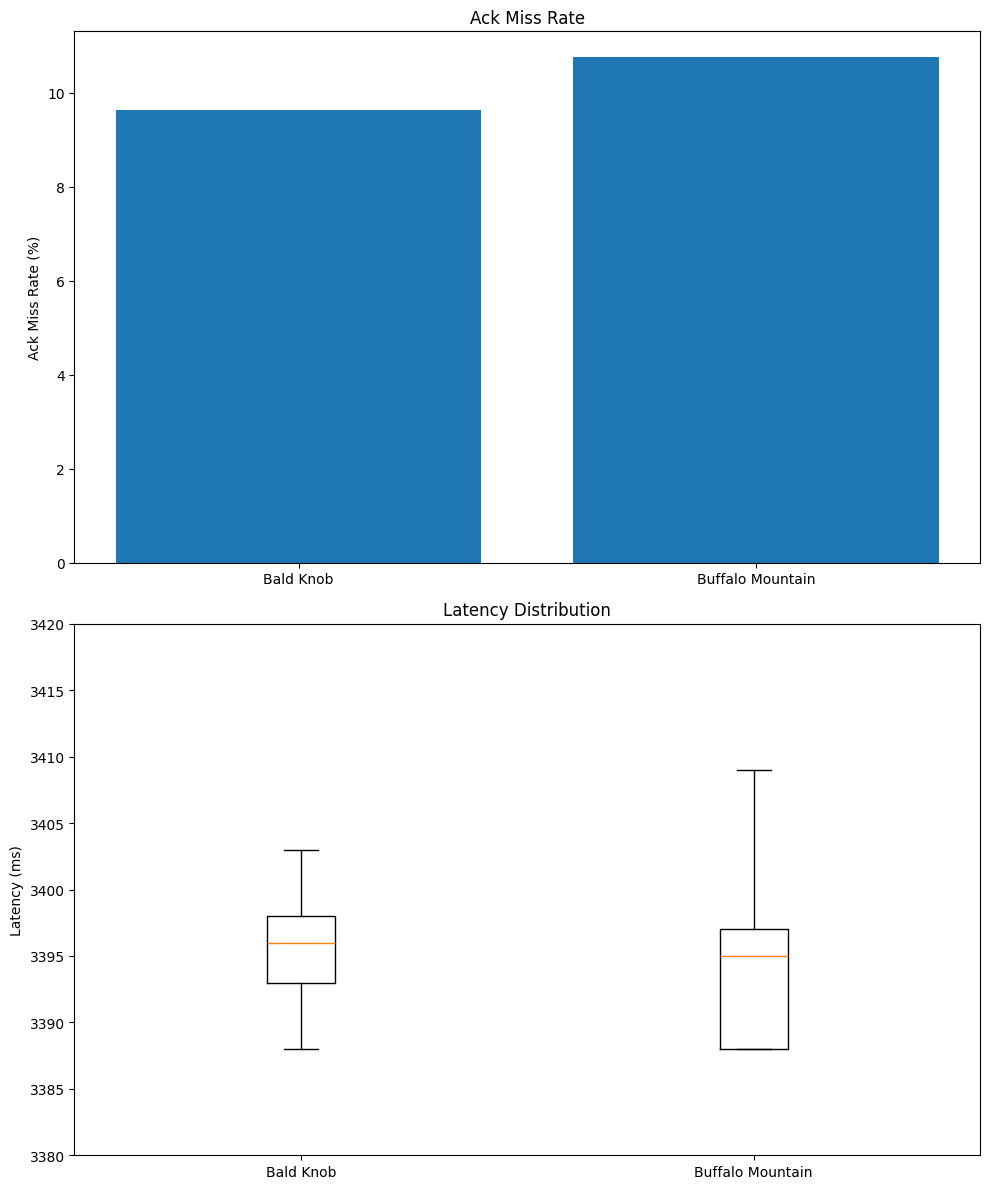

In [45]:
def plot_data(locations):
    fig, axes = plt.subplots(2, 1, figsize=(10, 12))  # Two rows, one column

    # Bar graph for miss rate
    axes[0].bar(["Bald Knob", "Buffalo Mountain"], [miss_rate_bk * 100, miss_rate_bm * 100])
    axes[0].set_title("Ack Miss Rate")
    axes[0].set_ylabel("Ack Miss Rate (%)")

    # Box and whisker plot for latency
    axes[1].boxplot([locations["BaldKnob"]["Latency"], locations["BuffaloMountain"]["Latency"]], 
                    labels=["Bald Knob", "Buffalo Mountain"], showfliers=False)
    axes[1].set_title("Latency Distribution")
    axes[1].set_ylabel("Latency (ms)")
    axes[1].set_ylim(3380, 3420)  

    plt.tight_layout()
    plt.show()

plot_data(locations)
